In [239]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix 
#df1=pd.read_excel(
 #    os.path.join(APP_PATH, "Data", "aug_latest.xlsm"),
  #   engine='openpyxl',
#)
wine_data=pd.read_excel('BlogOsVinhos.xlsx', engine='openpyxl')

In [319]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2993 non-null   object 
 1   Region             2989 non-null   object 
 2   Year               2993 non-null   int64  
 3   Color              2993 non-null   object 
 4   Castes             2989 non-null   object 
 5   AlcoholPercentage  2993 non-null   float64
 6   Producer           2993 non-null   object 
 7   MinimunPrice       2993 non-null   float64
 8   MaximumPrice       2993 non-null   float64
 9   Judge              2993 non-null   object 
 10  JudgeRating        2993 non-null   float64
 11  Date               2970 non-null   object 
 12  JudgeNotes         2992 non-null   object 
 13  Label              2992 non-null   object 
 14  Link               2993 non-null   object 
 15  IsVV               2993 non-null   int64  
dtypes: float64(4), int64(2),

In [105]:
wine_data.head(20)

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link,IsVV
0,.Beb 2007,Regional Alentejo,2007,Rosé,"Cabernet Sauvignon, Syrah e Touriga Nacional",13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço,15.5,Dezembro 2008,Cor vermelha brilhante e aromas iniciais domin...,Tem uma cor atraente e um aroma intenso a frut...,https://osvinhos.blogspot.pt/2010/03/1232-beb-...,0
1,.Beb 2009,Regional Alentejo,2009,Red,"Cabernet Sauvignon, Syrah, Alicante Bouschet e...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Susana Esteban,16.0,Novembro 2012,"Cor avermelhada e nariz muito aromático, onde ...",A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2013/08/2803-beb-...,0
2,.Beb 2010,Regional Alentejo,2010,Red,"Cabernet Sauvignon, Syrah, Alicante Bouschet e...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,16.0,Agosto 2013,Apresenta uma cor rubi agradavelmente concentr...,A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2014/01/2988-beb-...,0
3,.Beb 2011,Regional Alentejo,2011,White,"Arinto, Roupeiro e Viognier",13.5,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço e Susana Esteban,15.5,Setembro 2012,Cor amarela brilhante e nariz delicadamente ma...,Associámos uma vinha muito velha de Roupeiro c...,https://osvinhos.blogspot.pt/2013/09/2820-beb-...,0
4,.Beb 2012,Regional Alentejo,2012,White,"Encruzado, Verdelho e Viognier",13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço e Susana Esteban,16.0,Julho 2014,Apresenta uma cor amarela ligeiramente pálida ...,Associámos a estrutura e complexidade do Encru...,https://osvinhos.blogspot.pt/2015/06/3639-beb-...,0
5,.Beb 2013,Regional Alentejo,2013,Rosé,Touriga Nacional e Syrah,13.0,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço,15.0,Agosto 2014,Cor vermelha intensa e nariz rico em aromas de...,-,https://osvinhos.blogspot.pt/2015/08/3713-beb-...,0
6,.Beb Selection 2012,Regional Alentejo,2012,Red,"Touriga Nacional, Alicante Bouschet e Syrah",14.5,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,16.0,Outubro 2016,Cor rubi de intensidade média/alta e nariz exp...,A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2017/06/4436-beb-...,0
7,.Beb Selection 2014,Regional Alentejo,2014,White,"Encruzado, Verdelho e Viognier",13.5,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,16.0,Outubro 2016,Cor amarela brilhante e nariz elegante e muito...,Associámos a estrutura e complexidade do Encru...,https://osvinhos.blogspot.pt/2017/06/4440-beb-...,0
8,.Com 2007,Regional Alentejo,2007,Red,"Aragonez, Cabernet Sauvignon, Trincadeira e Al...",13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço,15.5,Julho 2009,Cor rubi de centro bem escuro e de laivos viol...,-,https://osvinhos.blogspot.pt/2010/08/1422-com-...,0
9,.Com 2009,Regional Alentejo,2009,Red,"Aragonez, Cabernet Sauvignon, Trincadeira e To...",14.0,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Susana Estéban,15.5,Agosto 2011,Cor rubi concentrada e leve tonalidade violeta...,-,https://osvinhos.blogspot.pt/2011/10/1945-com-...,0


In [240]:
#vinho_verde=wine_data[(wine_data["Region"]=="DOC Vinhos Verdes") | (wine_data["Region"]=="Regional Vinhos Verdes")| (wine_data["Region"]=="Mesa Vinhos Verdes")]
#Only Vinho Verde here

wine_data['IsVV']= wine_data['Region'].apply(lambda value: 1 if ((value == "DOC Vinhos Verdes") | (value== "Regional Vinhos Verdes") | (value== "Mesa Vinhos Verdes")) else 0)
#for j in range(2993):
#    if ((wine_data.iloc[j]['Region'][-6:])=='Verdes'):
#        wine_data.iloc[j]['IsVV']=1
#vinho_verde.shape


In [241]:
vinho_verde=wine_data[wine_data['IsVV']==1]

In [215]:
byCaste=vinho_verde.groupby('Castes')
byCaste.count()
vinho_verde.count()

Name                 134
Region               134
Year                 134
Color                134
Castes               134
AlcoholPercentage    134
Producer             134
MinimunPrice         134
MaximumPrice         134
Judge                134
JudgeRating          134
Date                 134
JudgeNotes           134
Label                134
Link                 134
IsVV                 134
MainAlv              134
MainLou              134
MainAri              134
IsDOC                134
IsWhite              134
IsRed                134
dtype: int64

In [257]:
#vinho_verde['grape']=''
vinho_verde['MainAlv']=wine_data['Castes'].apply(lambda value: 1 if (value[0:6] == "Alvari") else 0)
vinho_verde['MainLou']=0
vinho_verde['MainAri']=0
#vinho_verde.loc[vinho_verde['Castes'][0:6] == 'Alvari', 'MainAlv'] = 1 
#vinho_verde.loc[vinho_verde['Castes'][0:6] == 'Lourei', 'MainLou'] = 1 
#vinho_verde.loc[vinho_verde['Castes'][0:6] == 'Arinto', 'MainAri'] = 1 

TypeError: 'float' object is not subscriptable

In [255]:
#vinho_verde['MainAlv']=0
#vinho_verde.iloc[0]['MainAlv']
vinho_verde.head(20)

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link,IsVV,grape,MainAlv,MainLou,MainAri
17,1000 Curvas Chardonnay & Alvarinho 2014,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,7.5,10.0,Pedro Mota,16.0,Abril 2017,Cor amarela de média intensidade e nariz muito...,Vine-growers desde 1907. Sublimes terraços tra...,https://osvinhos.blogspot.pt/2017/11/4589-1000...,1.0,,False,0,0
18,1000 Curvas Oak Chardonnay & Alvarinho 2016,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,10.0,12.5,Pedro Mota,15.5,Março 2019,"Cor amarelo pálido, apresenta um nariz muito c...",Vine-growers desde 1907. Vinha plantada em sub...,https://osvinhos.blogspot.com/2019/11/5308-100...,1.0,,False,0,0
43,Adega Cooperativa de Ponte de Lima Loureiro 2011,DOC Vinhos Verdes,2011.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura,13.0,Agosto 2012,Cor amarela citrina e nariz preenchido por del...,-,https://osvinhos.blogspot.pt/2013/07/2726-adeg...,1.0,,False,0,0
44,Adega Cooperativa de Ponte de Lima Loureiro 2015,DOC Vinhos Verdes,2015.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura e Rita Araújo,13.5,Julho 2016,"Cor amarela citrina e nariz muito fresco, onde...",-,https://osvinhos.blogspot.pt/2017/03/4355-adeg...,1.0,,False,0,0
45,Adega Cooperativa Ponte da Barca Grande Escolh...,DOC Vinhos Verdes,2016.0,White,"Loureiro, Trajadura e Arinto",11.5,"Adega Cooperativa de Ponte da Barca, CRL",4.0,7.5,José Antas Oliveira,15.0,Outubro 2017,Cor citrina algo pálida e nariz mais floral e ...,"A história desta vila, terra de tradição de vi...",https://osvinhos.blogspot.com/2018/06/4802-ade...,1.0,,False,0,0
119,Adega do Presidente Adamado,DOC Vinhos Verdes,-1.0,White,"Loureiro, Trajadura, Avesso e Arinto",10.5,Caves Campelo S.A.,4.0,7.5,Reinaldo Pinho,12.0,Agosto 2016,Cor citrina e nariz levemente floral e cítrico...,Produzido na região dos Vinhos Verdes a partir...,https://osvinhos.blogspot.pt/2017/04/4386-adeg...,1.0,,False,0,0
149,Air 2015,DOC Vinhos Verdes,2015.0,White,"Loureiro, Avesso e Arinto",10.5,"António Lopes Ribeiro Wines, Lda",7.5,10.0,Luís Magalhães,15.5,Março 2018,"Cor citrina e nariz fresco, onde reinam os aro...","Nasci sobre uma adega entre vinhedos, numa cas...",https://osvinhos.blogspot.com/2018/11/4947-air...,1.0,,NaN,0,0
150,Air 2016,DOC Vinhos Verdes,2016.0,White,"Loureiro, Avesso e Arinto",10.5,"António Lopes Ribeiro Wines, Lda",7.5,10.0,Luís Magalhães,15.5,Abril 2018,Cor citrina pálida e nariz rico em aromas flor...,"Nasci sobre uma adega entre vinhedos, numa cas...",https://osvinhos.blogspot.com/2018/12/4986-air...,1.0,,NaN,0,0
202,Allo Alvarinho & Loureiro 2011,Regional Vinhos Verdes,2011.0,White,Alvarinho e Loureiro,11.0,Quinta de Soalheiro,4.0,7.5,António Luis Cerdeira,16.0,Julho 2012,Apresenta uma cor pálida e um nariz agradavelm...,-,https://osvinhos.blogspot.pt/2013/05/2655-allo...,1.0,,NaN,0,0
203,Allo Alvarinho & Loureiro 2012,Regional Vinhos Verdes,2012.0,White,Alvarinho e Loureiro,11.0,Quinta de Soalheiro,4.0,7.5,António Luis Cerdeira,16.5,Agosto 2013,Cor citrina pálida e nariz cheio de aromas flo...,Allo é um vinho branco vibrante e preciso com ...,https://osvinhos.blogspot.pt/2014/05/3148-allo...,1.0,,NaN,0,0


In [274]:
search ="Red"
s2='Alvari'
s3='Lourei'
s4='Arinto'
s5='DOC'
  
# boolean series returned 
vinho_verde['IsRed']= vinho_verde["Color"].str.startswith(search)
vinho_verde['IsAri']= vinho_verde["Castes"].str.startswith(s4)
vinho_verde['IsLou']= vinho_verde["Castes"].str.startswith(s3)
vinho_verde['IsAlv']= vinho_verde["Castes"].str.startswith(s2)
vinho_verde['IsDOC']= vinho_verde["Region"].str.startswith(s5)



In [266]:
vinho_verde.head()

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,...,IsVV,grape,MainAlv,MainLou,MainAri,IsRed,IsAri,IsLou,IsAlv,MeanPrice
17,1000 Curvas Chardonnay & Alvarinho 2014,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,7.5,10.0,Pedro Mota,...,1.0,,False,0,0,False,False,False,False,8.75
18,1000 Curvas Oak Chardonnay & Alvarinho 2016,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,10.0,12.5,Pedro Mota,...,1.0,,False,0,0,False,False,False,False,11.25
43,Adega Cooperativa de Ponte de Lima Loureiro 2011,DOC Vinhos Verdes,2011.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura,...,1.0,,False,0,0,False,False,True,False,3.00
44,Adega Cooperativa de Ponte de Lima Loureiro 2015,DOC Vinhos Verdes,2015.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura e Rita Araújo,...,1.0,,False,0,0,False,False,True,False,3.00
45,Adega Cooperativa Ponte da Barca Grande Escolh...,DOC Vinhos Verdes,2016.0,White,"Loureiro, Trajadura e Arinto",11.5,"Adega Cooperativa de Ponte da Barca, CRL",4.0,7.5,José Antas Oliveira,...,1.0,,False,0,0,False,False,True,False,5.75


In [188]:
vv_nec=pd.DataFrame()
vv_nec['MainLou']=vinho_verde['MainLou']
vv_nec['MainAri']=vinho_verde['MainAri']
vv_nec['MainAlv']=vinho_verde['MainAlv']
vv_nec['IsDOC']=vinho_verde['IsDOC']
vv_nec['IsWhite']=vinho_verde['IsWhite']
vv_nec['IsRed']=vinho_verde['IsRed']
vv_nec['AlcoholPercentage']=vinho_verde['AlcoholPercentage']
vv_nec['MinimumPrice']=vinho_verde['MinimunPrice']
vv_nec['MaximumPrice']=vinho_verde['MaximumPrice']
vv_nec['JudgeRating']=vinho_verde['JudgeRating']*2+56
vv_nec['MeanPrice']=(vinho_verde['MinimunPrice']+vinho_verde['MaximumPrice'])/2



In [211]:
vv_nec.min()

MainLou                False
MainAri                False
MainAlv                False
IsDOC                  False
IsWhite                False
IsRed                  False
AlcoholPercentage   -2.62186
MinimumPrice               2
MaximumPrice               4
JudgeRating          -3.7301
MeanPrice           -1.05756
dtype: object

In [320]:
vv_nec.sum()

MainLou                                                             27
MainAri                                                              8
MainAlv                                                             73
IsDOC                                                              102
IsWhite                                                            121
IsRed                                                                4
AlcoholPercentage                                         -5.55112e-16
MinimumPrice                                                       826
MaximumPrice                                                    1222.5
JudgeRating                                                1.33227e-15
MeanPrice                                                 -1.55431e-15
grape                AlvarinhoAlvarinhoAlvarinhoOtherArintoOtherAlv...
dtype: object

In [210]:
vv_nec = vv_nec.sample(frac=1, random_state=42).reset_index(drop=True)
sc=StandardScaler()
#vv_nec['AlcoholPercentage']=sc.fit_transform((vv_nec['AlcoholPercentage']).values.reshape(-1,1))
#vv_nec['MeanPrice']=sc.fit_transform((vv_nec['MeanPrice']).values.reshape(-1,1))
#vv_nec['JudgeRating']=sc.fit_transform((vv_nec['JudgeRating']).values.reshape(-1,1))
X=np.c_[(vv_nec.iloc[:,:-4]),vv_nec['JudgeRating']]
y=vv_nec['MeanPrice']
X=np.array(X, dtype=float)
y=np.array(y)

In [212]:
#X[1,:]
#y.head()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [213]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)
Xtrain = np.append (arr=np.ones([Xtrain.shape[0],1]).astype(int), values = Xtrain, axis = 1)
Xtest = np.append (arr=np.ones([Xtest.shape[0],1]).astype(int), values = Xtest, axis = 1)
import statsmodels.api as sm
X_opt = [0,1,2,3,4,5,6,7,8]
regressor = sm.OLS(ytrain, Xtrain[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     5.826
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           5.30e-06
Time:                        12:33:57   Log-Likelihood:                -128.92
No. Observations:                 100   AIC:                             275.8
Df Residuals:                      91   BIC:                             299.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3384      0.445     -0.761      0.4

In [173]:
Xtrain

array([[ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.26736062,  1.18629352],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.84520455,  0.64002777],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.26736062,  0.64002777],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        , -0.3104833 ,  1.18629352],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.84520455,  0.09376203],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.3104833 ,  0.64002777],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.88832723, -1.5450352 ],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.26736062,  0.09376203],
       [ 0.        ,  0.        

In [276]:
with_type=vinho_verde
with_type['grape']=''
with_type['MeanPrice']=(with_type['MinimunPrice']+with_type['MaximumPrice'])/2
with_type.loc[with_type['MainLou'] == True, 'grape2'] = 'Loureiro' 
with_type.loc[with_type['MainAlv'] == True, 'grape2'] = 'Alvarinho'
with_type.loc[with_type['MainAri'] == True, 'grape2'] = 'Arinto'
#for j in range(134):
#    if ((vv_nec.iloc[j]['MainAlv'])==1):
#        with_type.iloc[j]['grape']='Alvarinho'
    #elif ((vinho_verde.iloc[j]['Castes'][0:6])=='Lourei'):
     #   vinho_verde.iloc[j]['MainLou']=1
      #  vinho_verde.iloc[j]['grape']='Loureiro'
    #elif ((vinho_verde.iloc[j]['Castes'][0:6])=='Arinto'):
     #   vinho_verde.iloc[j]['MainAri']=1
      #  vinho_verde.iloc[j]['grape']='Arinto'
    #else:
     #   vinho_verde.iloc[j]['grape']='Other'


Text(0.5, 0, 'Average Price')

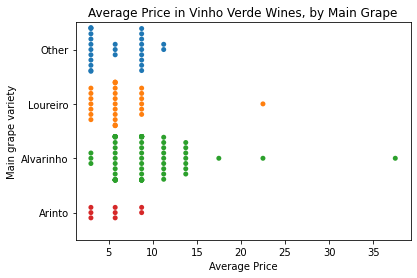

In [280]:
#j=10
box=sns.swarmplot (data=with_type, x='MeanPrice', y='grape')
#ticks = range(1, 4)
#labels = list(['High Quality','Medium Quality','Low Quality'])
#plt.xticks(ticks,labels)
plt.title('Average Price in Vinho Verde Wines, by Main Grape')
plt.ylabel('Main grape variety')
plt.xlabel('Average Price')

In [279]:
conditions = [
    (with_type['IsLou'] == True),
    (with_type['IsAri'] == True),
    (with_type['IsAlv'] == True),
    (with_type['IsAlv']|with_type['IsAri']|with_type['IsLou'] == False)
    ]

# create a list of the values we want to assign for each condition
values = ['Loureiro', 'Arinto', 'Alvarinho', 'Other']

# create a new column and use np.select to assign values to it using our lists as arguments
with_type['grape'] = np.select(conditions, values)

# display updated DataFrame
with_type['grape']

17             Other
18             Other
43          Loureiro
44          Loureiro
45          Loureiro
             ...    
2976       Alvarinho
2977       Alvarinho
2978       Alvarinho
2979       Alvarinho
MainAlv        Other
Name: grape, Length: 135, dtype: object

In [290]:
full=np.array([[  0 ,  0,   0,   0 ,  0  , 0 ,  0],
 [  0,   4,   0 ,  0 ,  0 ,  0  , 0],
 [  2,  34, 293,  77,   7 ,  2,   1],
 [  2,   4, 120 ,465, 106 , 13,   0],
 [  0,   0 ,  1,  41 ,108 , 12 ,  0],
 [  0,   0 ,  0 ,  0 ,  0,   8 ,  0],
 [  0,   0 ,  0 ,  0  , 0 ,  0  , 0]])

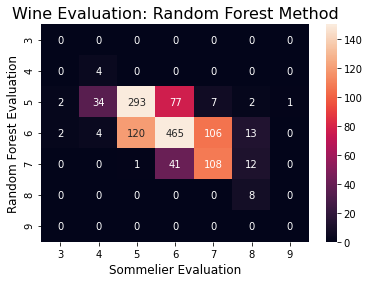

In [297]:
fig, ax = plt.subplots(1, 1)
boxplot = sns.heatmap(data=full, ax=ax, annot=True, fmt='g',vmax=150,vmin=0)
labels = ['3', '4', '5','6','7','8','9']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Wine Evaluation: Random Forest Method', fontsize=16);
ax.set_xlabel('Sommelier Evaluation', fontsize=12);
ax.set_ylabel('Random Forest Evaluation', fontsize=12);

In [293]:
np.info(sns.heatmap)

 heatmap(*args, **kwargs)

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise they are inferred from the
    data and other keyword arguments.
cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default will depend on whether ``center`` is set.
center : float, optional
    The value at which to center the colormap when plotting divergant dat

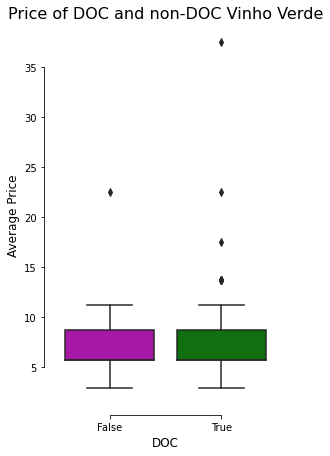

In [301]:
#Grouped Boxplots
f, ax = plt.subplots(figsize=(4,7 ))
sns.boxplot(x=vinho_verde["IsDOC"], y=vinho_verde['MeanPrice'], palette=["m", "g"], ax = ax)

sns.despine(offset=10, trim=True)
ax.set_title('Price of DOC and non-DOC Vinho Verde', fontsize=16);
ax.set_xlabel('DOC', fontsize=12);
ax.set_ylabel('Average Price', fontsize=12);

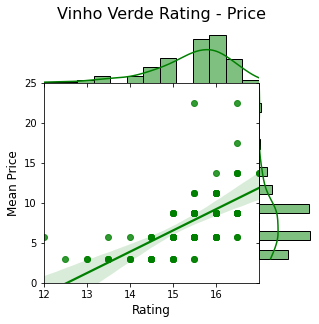

In [317]:
#Joint Plots
rj = sns.jointplot(x='JudgeRating', y='MeanPrice', data=vinho_verde,
kind='reg', ylim=(0, 25), 
color='green', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(12,17)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Vinho Verde Rating - Price', fontsize=16)
rj.set_axis_labels('Rating', 'Mean Price', fontsize=12)
#ax.set_title('Price of DOC and non-DOC Vinho Verde', fontsize=16);
#rj.ax_joint.xlabel('DOC', fontsize=12);
#rj.ax_joint.ylabel('Average Price', fontsize=12);

In [313]:
np.info(sns.jointplot)

 jointplot(*args, **kwargs)

Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
    Kind of plot to draw. See the examples for references to the underlying functions.
color : :mod:`matplotlib color <matplotlib.colors>`
    Single color specification for when hue mapping is not used. Otherwise, the
    plot will t

In [318]:
vinho_verde.head(50)

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,...,MainAlv,MainLou,MainAri,IsRed,IsAri,IsLou,IsAlv,MeanPrice,grape2,IsDOC
17,1000 Curvas Chardonnay & Alvarinho 2014,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,7.5,10.0,Pedro Mota,...,False,0,0,False,False,False,False,8.75,NaN,False
18,1000 Curvas Oak Chardonnay & Alvarinho 2016,Regional Vinhos Verdes,1000.0,White,Chardonnay e Alvarinho,12.5,Castanheira de Santa Leocádia Sociedade Agríco...,10.0,12.5,Pedro Mota,...,False,0,0,False,False,False,False,11.25,NaN,False
43,Adega Cooperativa de Ponte de Lima Loureiro 2011,DOC Vinhos Verdes,2011.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura,...,False,0,0,False,False,True,False,3.00,NaN,True
44,Adega Cooperativa de Ponte de Lima Loureiro 2015,DOC Vinhos Verdes,2015.0,White,Loureiro,11.0,Adega Cooperativa de Ponte de Lima,2.0,4.0,Fernando Moura e Rita Araújo,...,False,0,0,False,False,True,False,3.00,NaN,True
45,Adega Cooperativa Ponte da Barca Grande Escolh...,DOC Vinhos Verdes,2016.0,White,"Loureiro, Trajadura e Arinto",11.5,"Adega Cooperativa de Ponte da Barca, CRL",4.0,7.5,José Antas Oliveira,...,False,0,0,False,False,True,False,5.75,NaN,True
119,Adega do Presidente Adamado,DOC Vinhos Verdes,-1.0,White,"Loureiro, Trajadura, Avesso e Arinto",10.5,Caves Campelo S.A.,4.0,7.5,Reinaldo Pinho,...,False,0,0,False,False,True,False,5.75,NaN,True
149,Air 2015,DOC Vinhos Verdes,2015.0,White,"Loureiro, Avesso e Arinto",10.5,"António Lopes Ribeiro Wines, Lda",7.5,10.0,Luís Magalhães,...,NaN,0,0,False,False,True,False,8.75,NaN,True
150,Air 2016,DOC Vinhos Verdes,2016.0,White,"Loureiro, Avesso e Arinto",10.5,"António Lopes Ribeiro Wines, Lda",7.5,10.0,Luís Magalhães,...,NaN,0,0,False,False,True,False,8.75,NaN,True
202,Allo Alvarinho & Loureiro 2011,Regional Vinhos Verdes,2011.0,White,Alvarinho e Loureiro,11.0,Quinta de Soalheiro,4.0,7.5,António Luis Cerdeira,...,NaN,0,0,False,False,False,True,5.75,NaN,False
203,Allo Alvarinho & Loureiro 2012,Regional Vinhos Verdes,2012.0,White,Alvarinho e Loureiro,11.0,Quinta de Soalheiro,4.0,7.5,António Luis Cerdeira,...,NaN,0,0,False,False,False,True,5.75,NaN,False
